# Modeling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/PlatziMaster/Proyecto Agencia de Viajes/datasets'
!ls

/content/drive/My Drive/Colab Notebooks/PlatziMaster/Proyecto Agencia de Viajes/datasets
clean_data.csv	DataAcomodacion.csv  funciones_auxiliares.ipynb  train_data.txt


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("clean_data.csv", usecols=['duracion_estadia', 'genero', 'edad', 'ninos', 'tipo_acomodacion',
       'COL', 'ES', 'IT', 'NL', 'PE', 'UK', 'US'])

In [ ]:
df.head()

,duracion_estadia,genero,edad,ninos,tipo_acomodacion,COL,ES,IT,NL,PE,UK,US
0,7,1,40,0,0,1,0,0,0,0,0,0
1,4,1,39,1,1,0,1,0,0,0,0,0
2,5,1,45,0,1,0,0,0,1,0,0,0
3,5,0,45,1,1,0,0,0,0,0,1,0
4,7,1,47,1,0,0,0,1,0,0,0,0


In [ ]:
X = df.drop('tipo_acomodacion', axis=1)
y = df['tipo_acomodacion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
rfc = RandomForestClassifier(min_samples_leaf=10, min_samples_split=10,random_state=42)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import plot_roc_curve

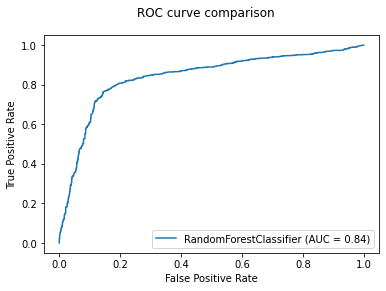

In [ ]:
rfc_disp = plot_roc_curve(rfc, X_test, y_test)
rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

In [ ]:
rfc.score(X_test, y_test)

0.8030984507746127

In [ ]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = AdaBoostClassifier(
    DecisionTreeClassifier(
        min_samples_leaf=10, 
        min_samples_split=10
        ), 
        n_estimators=600, random_state=42)

In [ ]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                     

In [ ]:
clf.score(X_test, y_test)

0.7406296851574213

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=1.0,
    max_depth=1, random_state=0
    )

In [ ]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gbc.score(X_test, y_test)

0.5657171414292853